# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Capstone Project-5 (Hand_Written_Digits)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to know about the updates, please don't forget to follow us </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# Hand Written Digits Project

**Data reference link:**

1. [TÜBİTAK Article](https://journals.tubitak.gov.tr/cgi/viewcontent.cgi?article=3717&context=elektrik)
2. [UCI Machine Learning Repository: Pen-Based Recognition of Handwritten Digits Dataset](https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits)

- This is a dataset used to recognize handwritten digits.

- The dataset contains scanned images of handwritten digits.

- The dataset has a total of 10 classes, with each class representing a digit between 0 and 9.

- Data from 44 subjects, with 250 samples each, has been collected.

- The dataset includes information about which digit each image represents, in addition to the image data.

- This dataset is often used to evaluate the performance of machine learning algorithms in handwriting recognition.

- It is also a popular dataset used in the training of deep learning models.

**Pen-Based Recognition of Handwritten Digits**

- We are creating a digit database by collecting 250 samples from a total of 44 writers. Samples written by 30 writers are used for training, cross-validation, and author-dependent testing, while samples from the remaining 14 writers are used for author-independent testing. This database is also available in UNIPEN format.

- We use a WACOM PL-100V pressure-sensitive tablet with an integrated LCD screen and a wireless pen. The input and display areas are located in the same place. This tablet, connected to the serial port of an Intel 486-based computer, allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pen pressure level values at fixed time intervals of 100 milliseconds (sampling rate).

- These writers are asked to write 250 digits in random order in boxes with a resolution of 500 by 500 tablet pixels. The subject is only monitored during the first input screens. Each screen contains five boxes displaying the digits to be written. Subjects are instructed to write only within these boxes. If they make a mistake or are unsatisfied with their writing, they are instructed to clear the contents of a box using a button on the screen. Since most writers are unfamiliar with such input devices, the first ten digits are ignored, although subjects are unaware of this.

- In our study, we only use ($x, y$) coordinate data. Pen pressure level values are ignored. First, we apply normalization to make our representation invariant to translations and scale distortions. The raw data from the tablet consists of integer values between 0 and 500 (tablet input box resolution). The new coordinates are adjusted so that the coordinate with the maximum range varies between 0 and 100. Since most characters are taller than they are wide, $x$ generally remains within this range.

**Breakdown of values**
The **Pen-Digit Dataset** is a collection of data that shows how people write numbers (0 to 9) using a special tablet that can track the pen's movements.

- When someone writes a number on this tablet, the **X** and **Y** values show where the pen is on the tablet.
- **X** is like the **left-to-right** position of the pen.
- **Y** is like the **up-and-down** position of the pen.

Imagine you’re writing the number “2” on a piece of paper. As you move your pen, the tablet records **8 different points** of the pen’s movement. Each point has an X value (how far left or right the pen is) and a Y value (how far up or down the pen is).

For example:
- X1, Y1 could be where you start writing “2.”
- X2, Y2 could be the next point as you curve the pen.
- And so on, until X8, Y8, which is near the end of writing the “2.”

These numbers (X and Y coordinates) help computers understand the shape of the digit you're writing.

### Simple Example:
- You start writing “2” at the top left corner of the tablet (X1 = 10, Y1 = 80).
- You move down a bit (X2 = 12, Y2 = 60).
- You curve around (X3 = 30, Y3 = 40), and so on.

The computer uses these points to figure out: "Oh, this looks like a '2'!"

### In summary:
- The **X and Y** values are just locations showing where the pen moved while writing a number.
- The computer learns from these locations to recognize the digit.

# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('pendigits_txt.csv')
df.head()



,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [4]:
df.isnull().sum()

input1     0
input2     0
input3     0
input4     0
input5     0
input6     0
input7     0
input8     0
input9     0
input10    0
input11    0
input12    0
input13    0
input14    0
input15    0
input16    0
class      0
dtype: int64

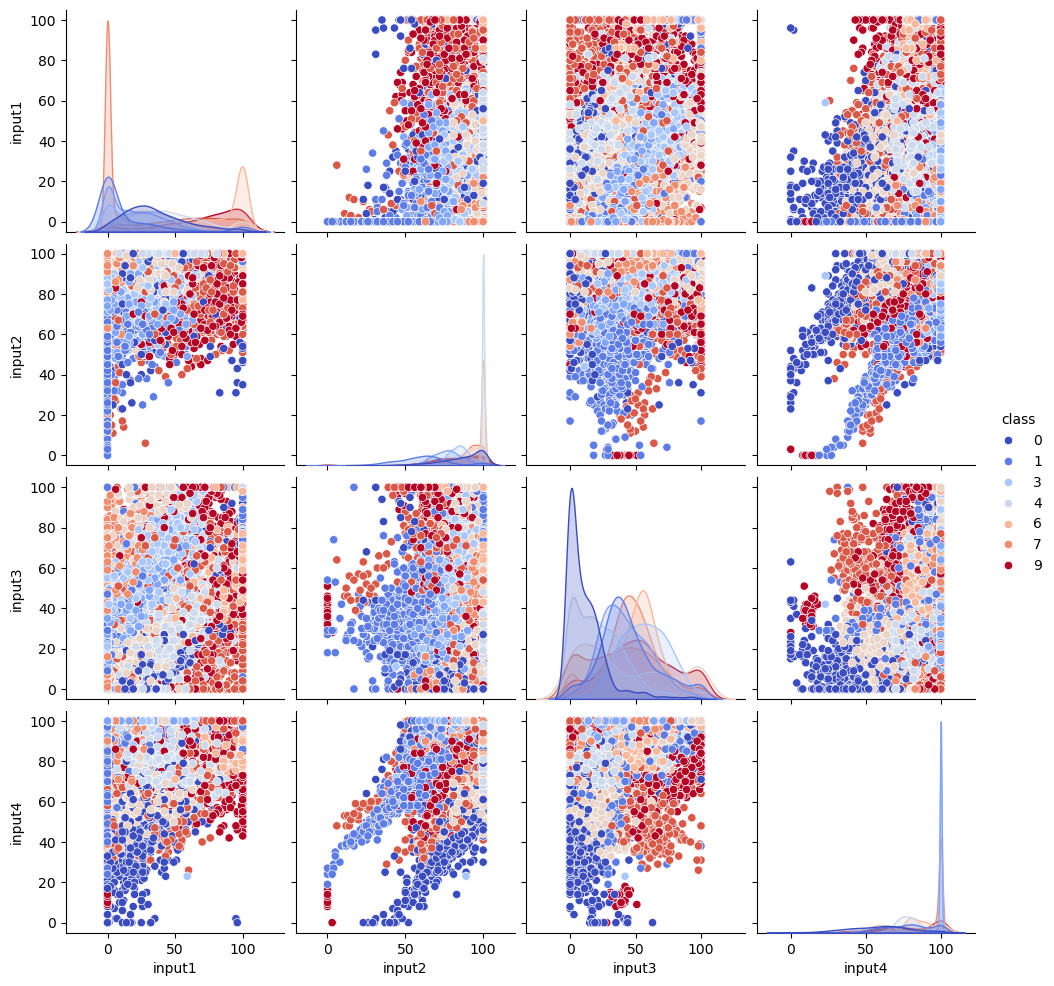

In [8]:
# We already have the cleaned data, now let's continue with some more in-depth EDA.

# Plotting pair plots to understand the relationship between a few key features and the class

# Select a subset of features for pairplot analysis to avoid too many combinations
subset_columns = ['input1', 'input2', 'input3', 'input4', 'class']

sns.pairplot(df[subset_columns], hue="class", palette="coolwarm")
plt.show()


In [9]:
# Check for correlations between features
corr = df.drop('class', axis=1).corr()


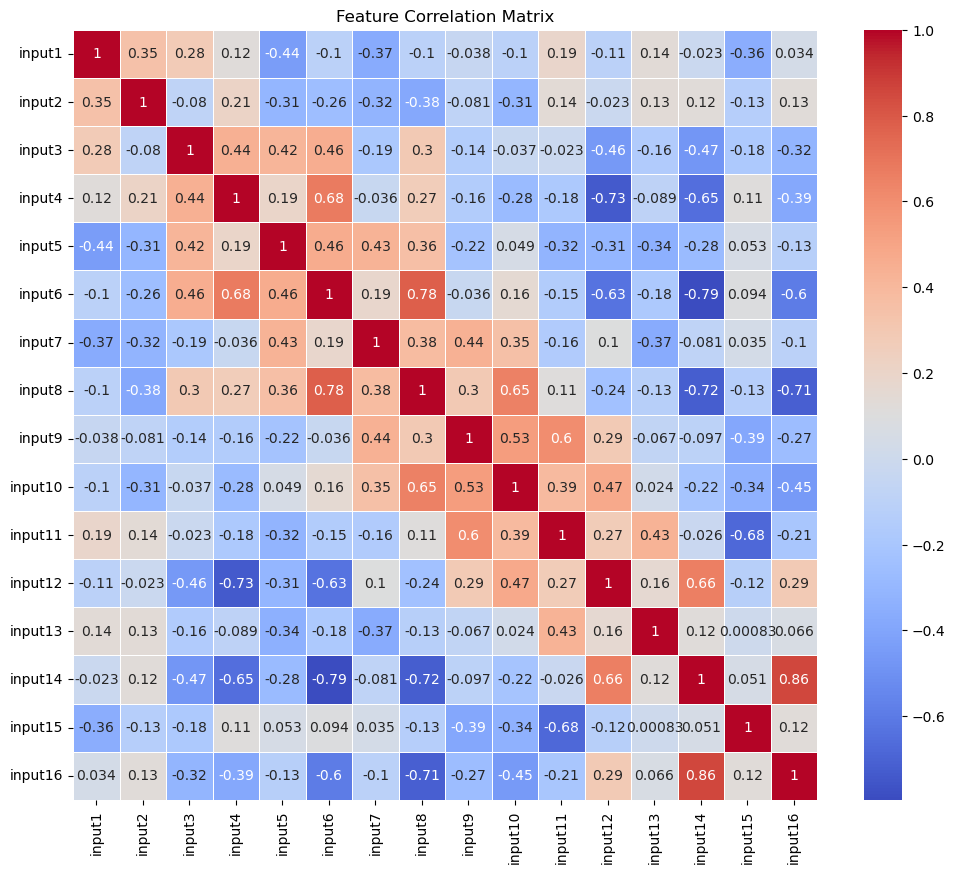

In [11]:
# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

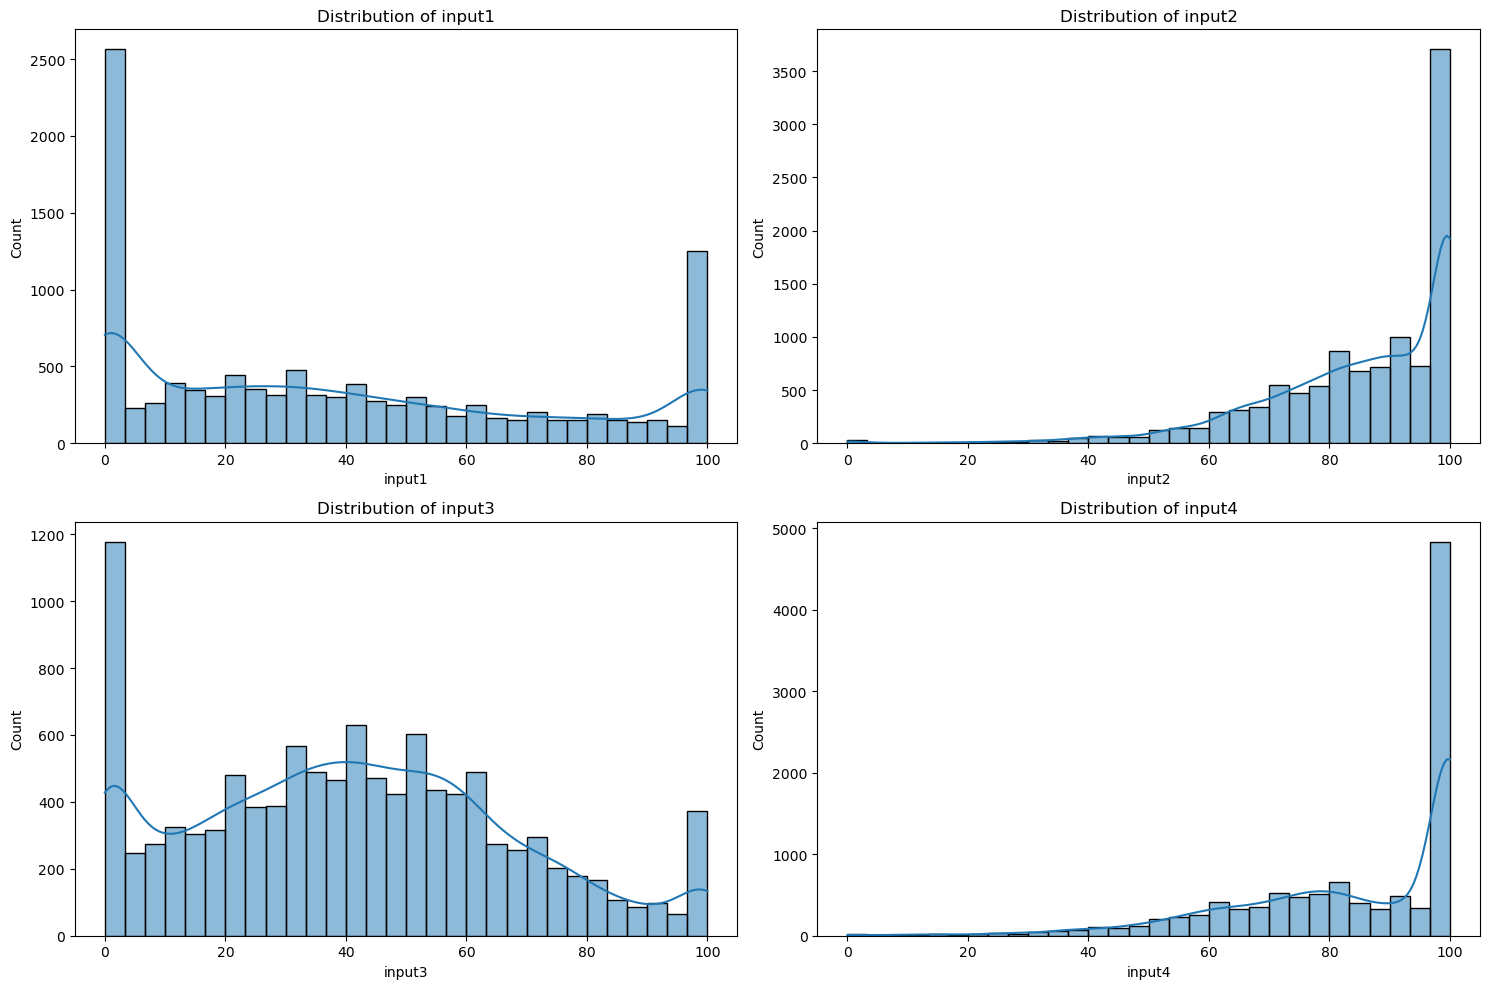

In [12]:
# Checking the distribution of a few select features
plt.figure(figsize=(15, 10))

for i, col in enumerate(['input1', 'input2', 'input3', 'input4'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

The distribution plots above provide useful insights into the first few features of the dataset (input1, input2, input3, input4):

<ul>Input Distributions:
<li>The distributions of the features appear to vary significantly, with some being more centered around specific values (e.g., input1 and input3), while others are more widely spread across the range (e.g., input2).</li>
<li>There are patterns in some inputs, such as multimodal distributions (e.g., input4), which might reflect different writing styles or digit patterns.</li>
These distributions indicate variability in how different features capture pen movement, which could be useful for machine learning models to distinguish between different digit classes.

# Support Vector Machine (SVM) Classifier

<b>Support Vector Machine (SVM):</b>

SVMs perform well with high-dimensional data and are effective for classification tasks like digit recognition. SVM can handle non-linear decision boundaries using the kernel trick.

Pros: Excellent for high-dimensional datasets, robust to outliers, performs well in classification tasks.

Cons: Computationally intensive, especially for large datasets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Split the data into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [14]:
print(accuracy)
print(classification_rep)

0.9799909049567985
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       229
           1       0.97      0.97      0.97       229
           2       0.98      0.99      0.98       229
           3       0.97      0.98      0.98       211
           4       1.00      1.00      1.00       229
           5       0.98      0.96      0.97       211
           6       1.00      1.00      1.00       211
           7       0.98      1.00      0.99       228
           8       0.95      0.96      0.96       211
           9       0.99      0.97      0.98       211

    accuracy                           0.98      2199
   macro avg       0.98      0.98      0.98      2199
weighted avg       0.98      0.98      0.98      2199



The Support Vector Machine (SVM) model achieved an impressive accuracy of 97.99% on the test set.

Insights:

The model handled all digit classes quite well, with particularly strong performance for digits 4, 6, and 7.

The overall accuracy shows that SVM is a strong choice for this dataset.

# Decision Tree (DT) Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

In [17]:
print(accuracy_dt)
print(classification_rep_dt)

0.9613460663938154
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       229
           1       0.94      0.92      0.93       229
           2       0.96      0.96      0.96       229
           3       0.95      0.95      0.95       211
           4       0.97      1.00      0.98       229
           5       0.96      0.95      0.96       211
           6       0.95      0.98      0.97       211
           7       0.98      0.98      0.98       228
           8       0.97      0.95      0.96       211
           9       0.97      0.94      0.95       211

    accuracy                           0.96      2199
   macro avg       0.96      0.96      0.96      2199
weighted avg       0.96      0.96      0.96      2199



## Decision Tree Classifier Performance

### Accuracy: 
- **96.13%**

### Insights:
- **Precision**: The precision for most digit classes is very high, ranging from 0.94 to 0.98.
- **Recall**: The recall values are strong, with most digits being correctly identified at a high rate.
- **F1-score**: The F1-scores balance precision and recall effectively across all digit classes.
- **Overall Performance**: The Decision Tree model performed well, though its accuracy is slightly lower compared to the SVM model (96.13% vs. 97.99%).
  
### Potential Improvements:
- **Tuning**: Hyperparameter tuning (e.g., adjusting the depth of the tree) could help reduce overfitting and further improve performance.
- **Comparison**: While the Decision Tree classifier is simpler and interpretable, more complex models like SVM slightly outperform it in terms of accuracy.


# Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)


In [20]:
print(accuracy_rf)
print(classification_rep_rf)

0.9918144611186903
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      0.97      0.98       229
           2       0.97      0.99      0.98       229
           3       0.99      0.99      0.99       211
           4       0.99      1.00      0.99       229
           5       1.00      1.00      1.00       211
           6       1.00      1.00      1.00       211
           7       0.98      1.00      0.99       228
           8       1.00      1.00      1.00       211
           9       1.00      0.99      0.99       211

    accuracy                           0.99      2199
   macro avg       0.99      0.99      0.99      2199
weighted avg       0.99      0.99      0.99      2199



## Random Forest Classifier Performance

### Accuracy: 
- **99.18%**


### Insights:
- **Overall Accuracy**: The model performed exceptionally well, achieving an accuracy of **99.18%**, with near-perfect precision, recall, and F1-scores.
- **Class Performance**: Most classes have precision and recall values close to 1, meaning the Random Forest classifier is highly accurate in predicting all digits.
  
### Conclusion:
- The **Random Forest Classifier** significantly outperforms the **Decision Tree** and **SVM** models in terms of accuracy. Its ability to correctly classify nearly all test examples shows that it is a robust model for this dataset.


# Choose the Best Model

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Congratulations</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |